# Explicación de `BatchNormalization`

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

`BatchNormalization` consiste en una técnica que *normaliza* la salida de una capa en una red neuronal para que tenga:

+ Media cerecana a 0
+ Desviación estándar cercana a 1

Esto ayuda a que el entrenamiento sea **más rápido y estable**

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Input, ReLU
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler

# Paso 1 - Crea un dataset simple no lineal

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=29)

# Paso 2 - Separación de daata de entrenamiento y validación

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Paso 3 - Modelo SIN `BatchNormalization`

In [ ]:
modelo_sin_bn = Sequential([
    Input(shape=(2,)),
    Dense(64, activation='relu', name="CapaDensa_1"),
    Dense(64, activation='relu', name="CapaDensa_2"),
    Dense(1, activation='sigmoid', name="CapaSalida")
], name="mi_cnn")

modelo_sin_bn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
modelo_sin_bn.summary()

Model: "mi_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CapaDensa_1 (Dense)             │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaDensa_2 (Dense)             │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaSalida (Dense)              │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

# Paso 4 - Modelo CON `BackNormalization`

In [ ]:
modelo_con_bn = Sequential([
    Input(shape=(2,)),
    Dense(64, name="CapaDensa_1"),
    BatchNormalization(name="BackNormalization_1"),
    Dense(64, name="CapaDensa_2"),
    BatchNormalization(name="BackNormalization_2"),
    Dense(1, activation='sigmoid', name="CapaSalida")
], name="cnn_con_bn")
modelo_con_bn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
modelo_con_bn.summary()

Model: "cnn_con_bn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CapaDensa_1 (Dense)             │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BackNormalization_1             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaDensa_2 (Dense)             │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BackNormalization_2             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaSalida (Dense)              │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 256 (1.00 KB)

# Paso 5 - Entrenamiento


In [ ]:

hist_sin_bn = modelo_sin_bn.fit(X_train, y_train, epochs=50, batch_size=32,
                                validation_data=(X_test, y_test), verbose=0)

hist_con_bn = modelo_con_bn.fit(X_train, y_train, epochs=50, batch_size=32,
                                validation_data=(X_test, y_test), verbose=0)



# Paso 6 - Comparación de resultados

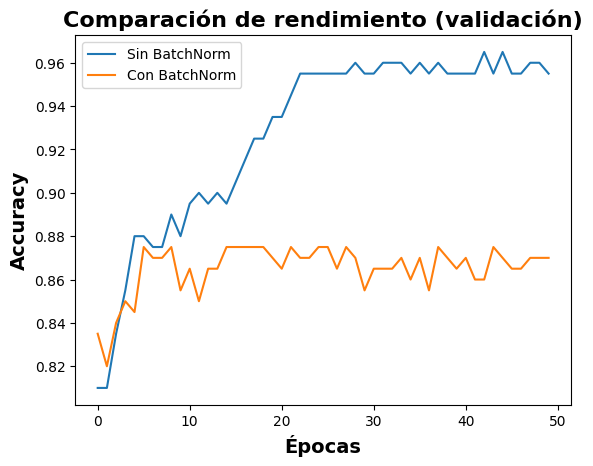

In [ ]:
plt.plot(hist_sin_bn.history['val_accuracy'], label='Sin BatchNorm')
plt.plot(hist_con_bn.history['val_accuracy'], label='Con BatchNorm')
plt.title('Comparación de rendimiento (validación)', fontsize=16, fontweight="bold")
plt.xlabel('Épocas', fontsize=14, fontweight="bold")
plt.ylabel('Accuracy', fontsize=14, fontweight="bold")
plt.legend()
plt.show()

🧠 **¿Por qué puede tener más accuracy el modelo sin BatchNormalization?**

BatchNormalization no garantiza que el modelo siempre tendrá mayor accuracy, especialmente en conjuntos de datos pequeños o simples. Algunas posibles razones:

+ **Mayor estabilidad es distinto a mejor accuracy inmediato:**
BN mejora la estabilidad del entrenamiento, sin embargo, puede limitar la capacidad del modelo de ajustarse a datos muy simples (pues regula demasiado las activaciones).

+ **Regularización implícita:**
BN actúa como una forma de regularización (similar al dropout), reduciendo el riesgo de overfitting, pero también puede reducir ligeramente el ajuste al conjunto de entrenamiento.

+ **Fluctuaciones estadísticas:**
En conjuntos de datos pequeños, las estadísticas por batch pueden variar bastante y afectar negativamente la convergencia si el batch size es chico o el modelo es muy simple.

# Paso 7 - Análisis de otras métricas

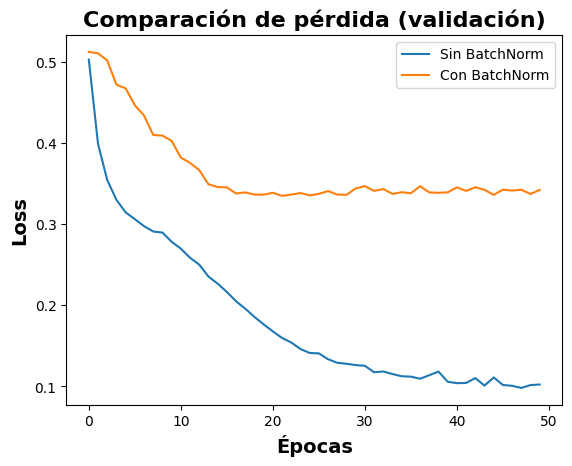

In [ ]:
plt.plot(hist_sin_bn.history['val_loss'], label='Sin BatchNorm')
plt.plot(hist_con_bn.history['val_loss'], label='Con BatchNorm')
plt.title('Comparación de pérdida (validación)', fontsize=16, fontweight="bold")
plt.xlabel('Épocas', fontsize=14, fontweight="bold")
plt.ylabel('Loss', fontsize=14, fontweight="bold")
plt.legend()
plt.show()


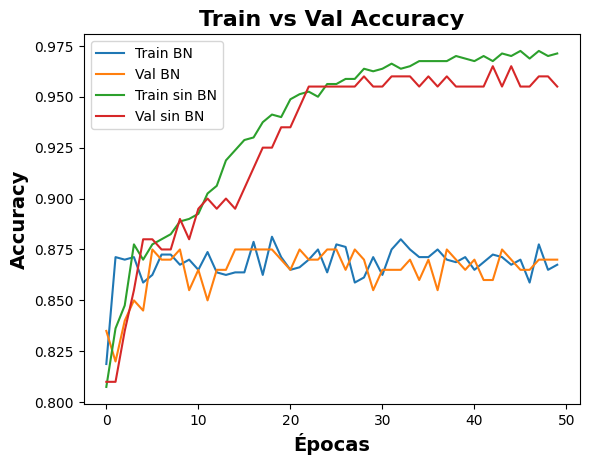

In [ ]:
plt.plot(hist_con_bn.history['accuracy'], label='Train BN')
plt.plot(hist_con_bn.history['val_accuracy'], label='Val BN')
plt.plot(hist_sin_bn.history['accuracy'], label='Train sin BN')
plt.plot(hist_sin_bn.history['val_accuracy'], label='Val sin BN')
plt.title('Train vs Val Accuracy', fontsize=16, fontweight="bold")
plt.xlabel('Épocas', fontsize=14, fontweight="bold")
plt.ylabel('Accuracy', fontsize=14, fontweight="bold")
plt.legend()
plt.show()


# Visualización del efecto de `BackNormalization`

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


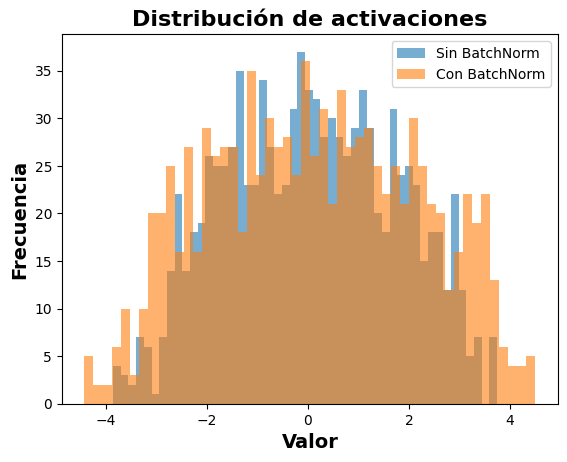

In [ ]:
# Entrada sintética
X_visualizacion = np.random.rand(1000, 2) * 10 - 5  # Distribución en [-5, 5]

# Modelo sin BN
inputs = Input(shape=(2,))
dense_sin_bn = Dense(1)(inputs)
modelo_sin_bn = Model(inputs, dense_sin_bn)

# Modelo con BN
inputs_bn = Input(shape=(2,))
dense_bn = Dense(1)(inputs_bn)
norm_bn = BatchNormalization()(dense_bn)
modelo_con_bn = Model(inputs_bn, norm_bn)

# Predicciones (activaciones)
activ_sin_bn = modelo_sin_bn.predict(X_visualizacion)
activ_con_bn = modelo_con_bn.predict(X_visualizacion)

# Visualización
plt.hist(activ_sin_bn, bins=50, alpha=0.6, label='Sin BatchNorm')
plt.hist(activ_con_bn, bins=50, alpha=0.6, label='Con BatchNorm')
plt.title('Distribución de activaciones', fontsize=16, fontweight="bold")
plt.legend()
plt.xlabel('Valor', fontsize=14, fontweight="bold")
plt.ylabel('Frecuencia', fontsize=14, fontweight="bold")
plt.show()


✅ **Interpretación**

Este gráfico muestra cómo `BackNormalization` normaliza la activación de una capa para centrarla en torno a 0, ayudando a que la red mantenga estables las distribuciones a lo largo del entrenamiento.

# Ejemplo de clasificación binaria

## Generación de datos

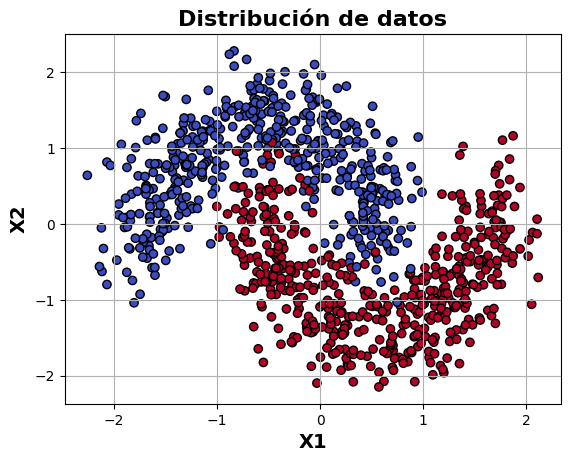

In [ ]:
# Generar datos
X, y = make_moons(n_samples=1000, noise=0.2, random_state=29)

# Normalizar características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

# Visualización
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Distribución de datos", fontsize=16, fontweight="bold")
plt.xlabel("X1", fontsize=14, fontweight="bold")
plt.ylabel("X2", fontsize=14, fontweight="bold")
plt.grid(True)
plt.show()


## Modelos con y sin `BackNormalization`

In [ ]:
# Modelo sin BatchNorm
def crear_modelo_sin_bn(name_n : str = "cnn_sin_bn") -> Model:
    modelo = Sequential([
        Input(shape=(2,), name="CapaEntrada"),
        Dense(32, activation='relu', name="CapaDensa_1"),
        Dense(32, activation='relu', name="CapaDensa_2"),
        Dense(1, activation='sigmoid', name="CapaSalida")
    ], name = name_n)
    return modelo

# Modelo con BatchNorm
def crear_modelo_con_bn(name_n : str = "cnn_con_bn") -> Model:
    modelo = Sequential([
        Input(shape=(2,), name="CapaEntrada"),
        Dense(32, name="CapaDensa_1"),
        BatchNormalization(name="CapaBackNormalization_1"),
        ReLU(name="CapaReLU_1"),
        Dense(32, name="CapaDensa_2"),
        BatchNormalization(name="CapaBackNormalization_2"),
        ReLU(name="CapaReLU_2"),
        Dense(1, activation='sigmoid', name="CapaSalida")
    ], name=name_n)
    return modelo

# Crear y compilar
modelo_sin_bn = crear_modelo_sin_bn()
modelo_con_bn = crear_modelo_con_bn()

for x_model in [modelo_sin_bn, modelo_con_bn]:
    x_model.compile(optimizer=Adam(0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


## Entrenamiento de las redes

In [ ]:
# Entrenar
hist_sin_bn = modelo_sin_bn.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
hist_con_bn = modelo_con_bn.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

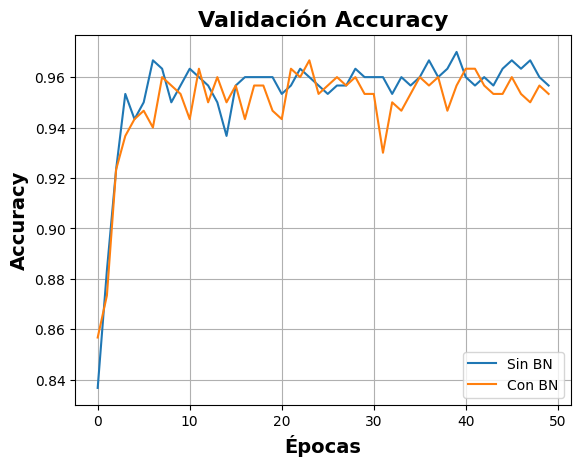

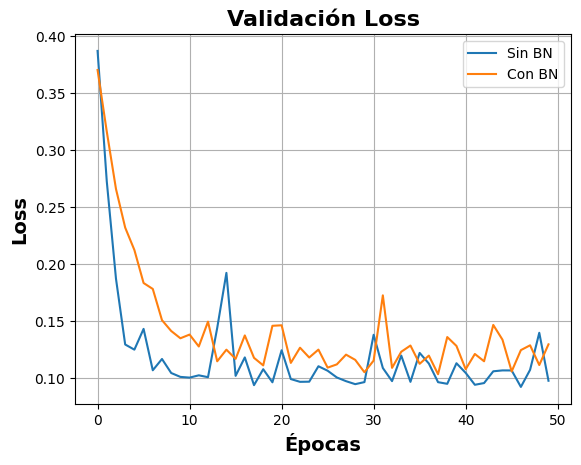

In [ ]:
# Accuracy
plt.plot(hist_sin_bn.history['val_accuracy'], label='Sin BN')
plt.plot(hist_con_bn.history['val_accuracy'], label='Con BN')
plt.title('Validación Accuracy', fontsize=16, fontweight="bold")
plt.xlabel('Épocas', fontsize=14, fontweight="bold")
plt.ylabel('Accuracy', fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True)
plt.show()

# Pérdida
plt.plot(hist_sin_bn.history['val_loss'], label='Sin BN')
plt.plot(hist_con_bn.history['val_loss'], label='Con BN')
plt.title('Validación Loss', fontsize=16, fontweight="bold")
plt.xlabel('Épocas', fontsize=14, fontweight="bold")
plt.ylabel('Loss', fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True)
plt.show()


## Visualiza las fronteras de decisión

In [ ]:
def plot_decision_boundary(model : Model, X : np.array, y : np.array, title : str) -> None:
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.6, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title, fontsize=16, fontweight="bold")
    plt.xlabel("X1", fontsize=14, fontweight="bold")
    plt.ylabel("X2", fontsize=14, fontweight="bold")
    plt.grid(True)
    plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


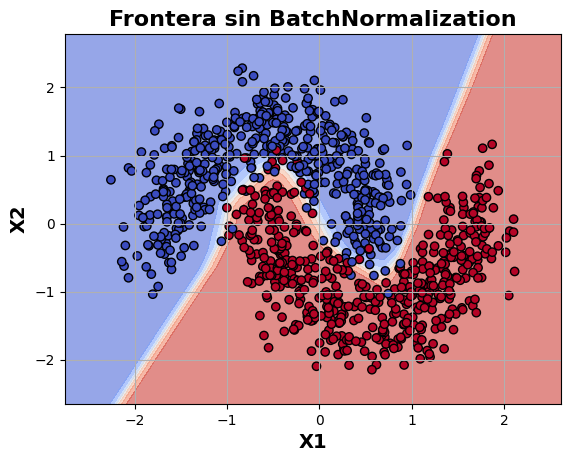

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


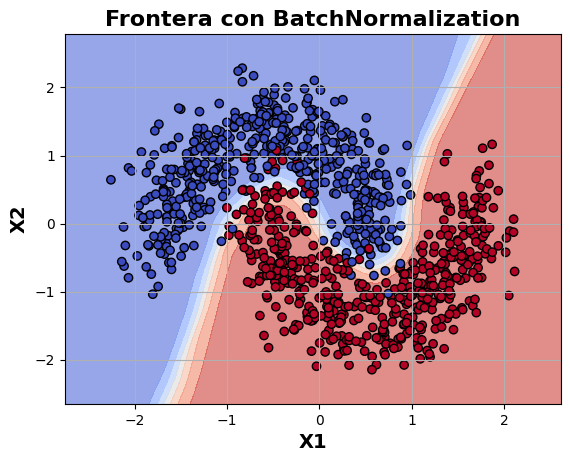

In [ ]:
# Muestra las fronteras de decisión
plot_decision_boundary(modelo_sin_bn, X, y, "Frontera sin BatchNormalization")
plot_decision_boundary(modelo_con_bn, X, y, "Frontera con BatchNormalization")
